## Import Required Packages

In [1]:
import tensorflow as tf

## Load the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

## Model Building

In [4]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            32, (3, 3), padding="same", input_shape=(28, 28, 1), activation="relu"
        ),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [5]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        1

In [6]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/10
1875/1875 [==============================] - 23s 8ms/step - loss: 0.1671 - accuracy: 0.9517 - val_loss: 0.0400 - val_accuracy: 0.9876
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0765 - accuracy: 0.9786 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0632 - accuracy: 0.9826 - val_loss: 0.0396 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0529 - accuracy: 0.9850 - val_loss: 0.0341 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0469 - accuracy: 0.9869 - val_loss: 0.0247 - val_accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0395 - accuracy: 0.9885 - val_loss: 0.0241 - val_accuracy: 0.9942
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0371 - accuracy: 0.9896 - val_loss: 0.0163 - val_ac

## Model Evaluation

In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0207 - accuracy: 0.9944
Test Loss: 0.020654715597629547, Test Accuracy: 0.9944000244140625


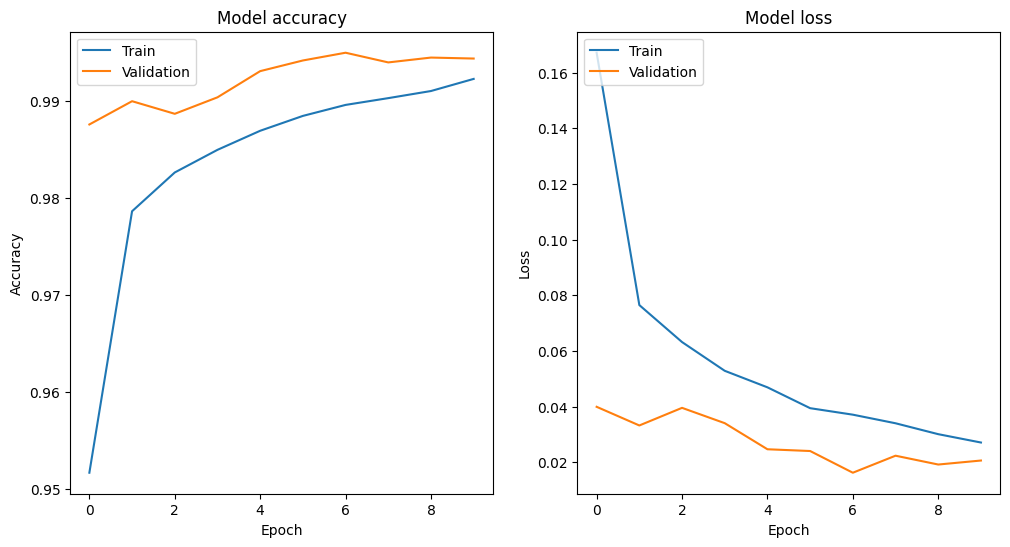

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

## Model Saving

In [9]:
model.save("./model/bird_model.keras")